In [1]:
import torch
from matplotlib import pyplot
import numpy as np
from matplotlib import pyplot as plt
device = torch.device("cuda:7")

In [2]:
from src import setup_std_stream_logger
setup_std_stream_logger(debug=False)

In [3]:
from src.integration import DefaultIntegrator

In [4]:
# Defining a camel function
def f(x):
    return torch.exp( - torch.sum(((x-0.25)/0.1)**2,axis=-1)) + torch.exp( - torch.sum(((x-0.75)/0.1)**2,axis=-1))

In [5]:
integrator=DefaultIntegrator(f=f, d=2, device=device, n_epochs=20, minibatch_size=10000,lr=1.e-4, model_params={"repetitions":3})

In [6]:
result=integrator.integrate(2,10)

Starting integration
Initializing the survey phase
Starting the survey phase
Integral: 6.325e-02 +/- 5.268e-04
Integral: 6.393e-02 +/- 5.282e-04
Finalizing the survey phase
Initializing the refine phase
Starting the refine phase
Integral: 6.283e-02 +/- 7.005e-05
Integral: 6.286e-02 +/- 1.036e-04
Integral: 6.271e-02 +/- 6.777e-05
Integral: 6.282e-02 +/- 7.319e-05
Integral: 6.282e-02 +/- 6.969e-05
Integral: 6.290e-02 +/- 1.057e-04
Integral: 6.283e-02 +/- 6.904e-05
Integral: 6.270e-02 +/- 6.775e-05
Integral: 6.266e-02 +/- 6.634e-05
Integral: 6.258e-02 +/- 6.571e-05
Finalizing the refine phase
Final result: 6.27713e-02 +/- 2.44299e-05


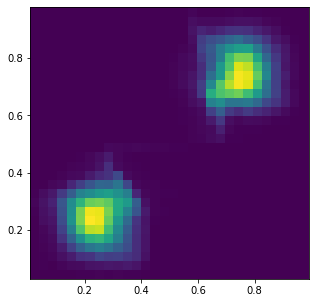

In [8]:
x=integrator.model_trainer.sample_forward(100000).cpu().numpy()
plt.figure(figsize=(5,5))
plt.hist2d(x[:,0],x[:,1],bins=30)
plt.show()